In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
labels = []
values = []

for col in train.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(spearmanr(train[col].values, train['target'].values)[0])

correlation_df = pd.DataFrame({'column_label':labels, 'correlation_val':values})        
correlation_df = correlation_df.sort_values(by='correlation_val')

correlation_df = correlation_df[(correlation_df['correlation_val']>0.1) | (correlation_df['correlation_val']<-0.1)]

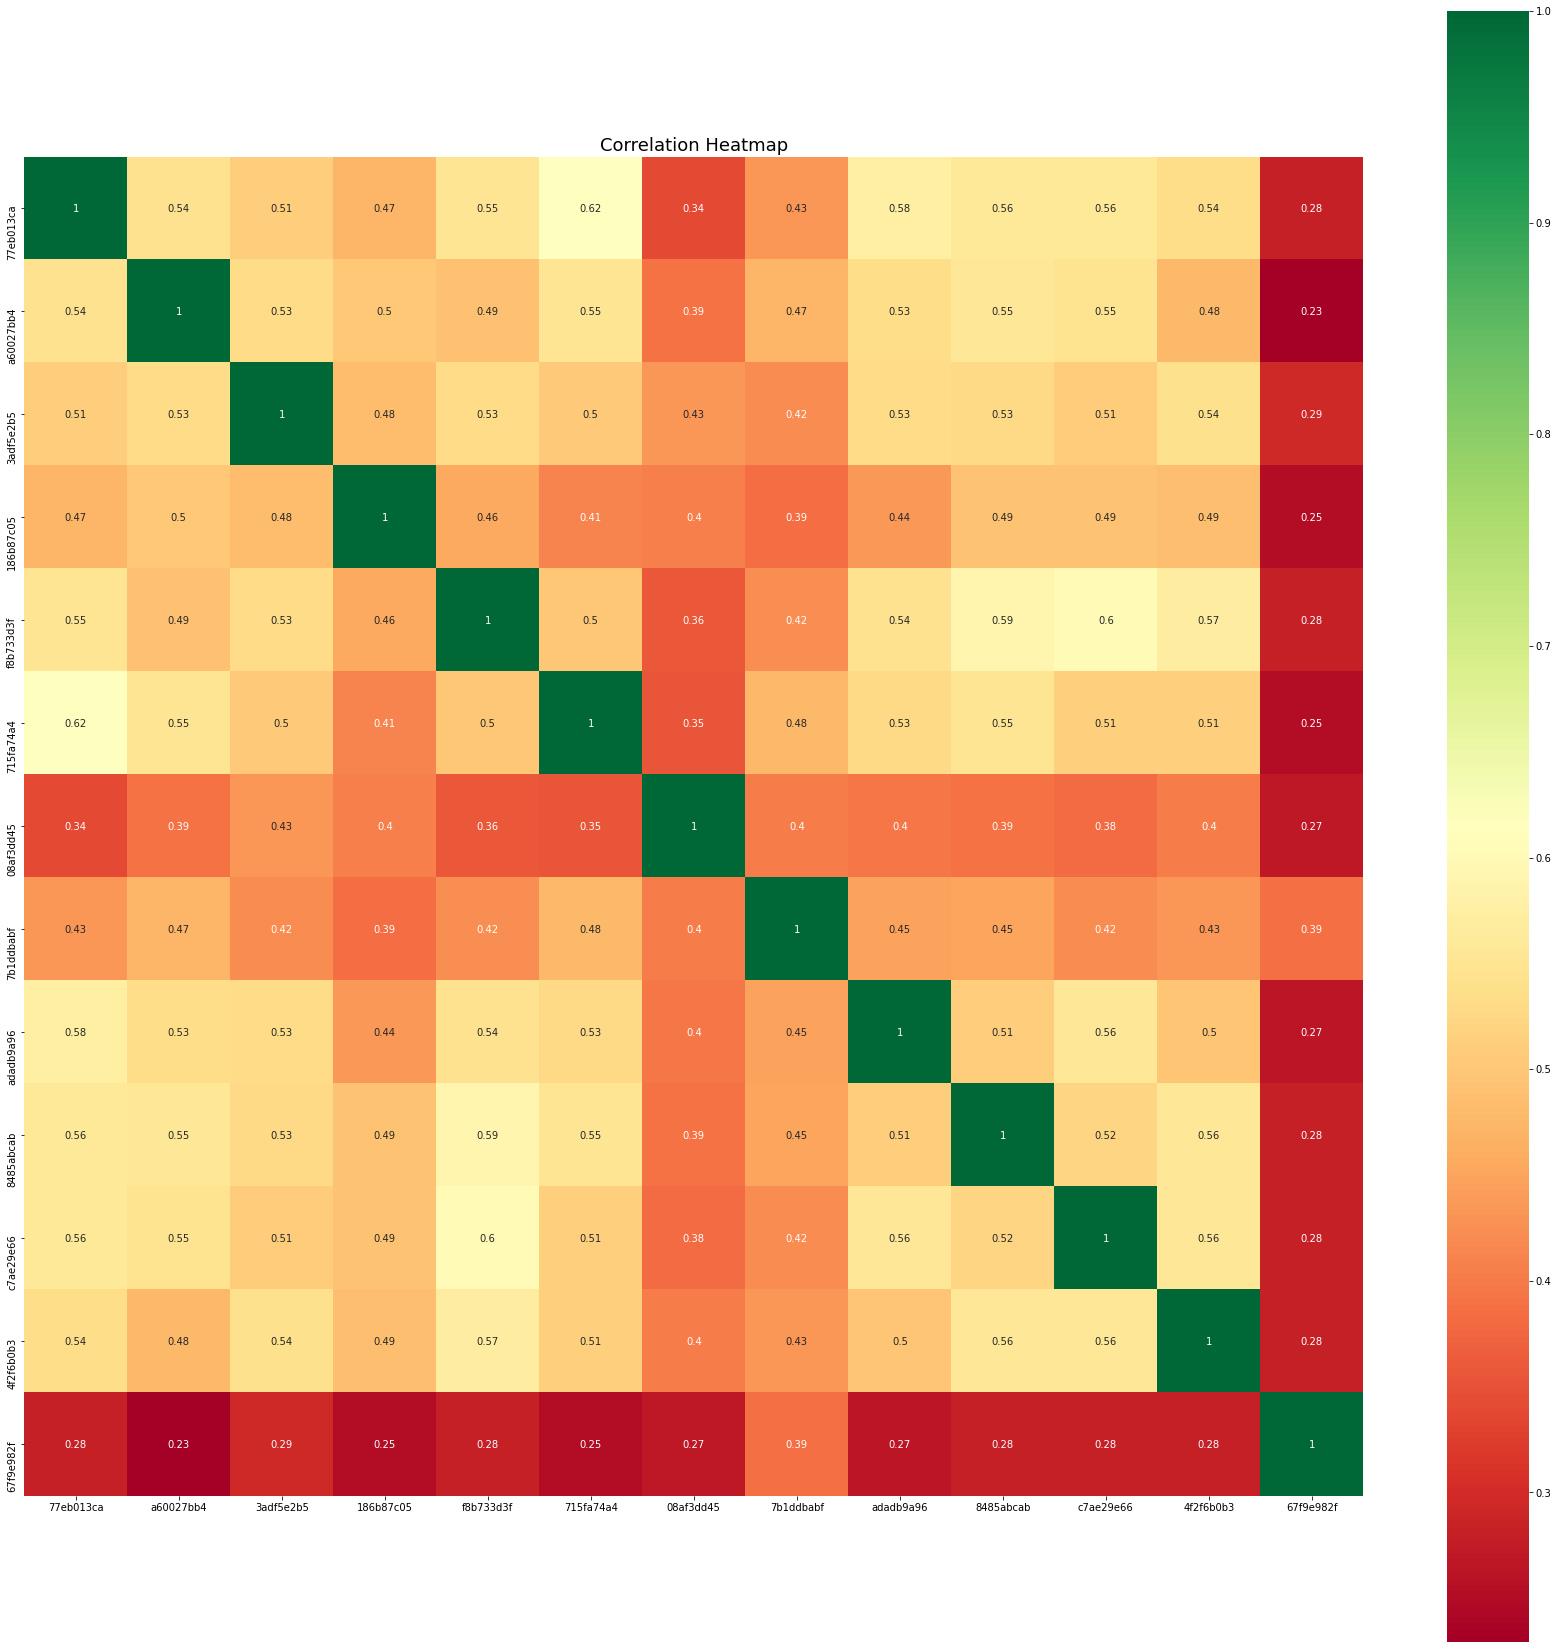

In [4]:
columns = correlation_df[(correlation_df['correlation_val']>0.11) | (correlation_df['correlation_val']<-0.11)].column_label.tolist()

tmp = train[columns]
comat = tmp.corr(method='spearman') #Since we used spearman coefficient
fig, ax = plt.subplots(figsize=(30,30))

sns.heatmap(comat, square=True, cmap="RdYlGn", annot=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()